In [52]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
# Import data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv('ADP_prices.csv',index_col='date', parse_dates=['date'], date_parser=dateparse)

In [3]:
data.head(10)
#data[1:].corr()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100
2010-01-05,ADP,37.445127,37.401232,37.199301,37.673399,3252400
2010-01-06,ADP,37.576823,37.313436,36.918352,37.655840,3111400
2010-01-07,ADP,36.988588,37.295874,36.953471,37.313436,2513300
2010-01-08,ADP,37.243197,37.243197,36.909571,37.278314,2310400
2010-01-11,ADP,37.243197,37.410010,36.988588,37.410010,2446200
2010-01-12,ADP,37.190520,37.146623,36.865675,37.436350,2571200
2010-01-13,ADP,37.076384,37.418791,36.927130,37.515368,2546000
2010-01-14,ADP,37.129061,37.313436,37.093943,37.559263,2402700


In [4]:
#calculate the clossing price change from the previous day
data['change'] = data.close.diff()

In [5]:
#momentum = data['change'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

In [6]:
#calculate the momentum (increase/decrease) in closing price
data['momentum'] = np.where((data['change'].notna()),(data['change'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))),np.nan)

In [7]:
#data['avg_1'] = data['change'].rolling(1).mean()

In [8]:
#price changes from last 5 days
#data['price_violatality'] = data['change'].rolling(5).mean()

In [9]:
# price trend from last 5 days
#data['stock_momentum'] = data['momentum'].rolling(5).mean()

In [10]:
#calculate the day of the week
day = data.index.to_series()
data['day_of_week'] = day.dt.day_name()


In [11]:
data.to_csv(r'stock_data.csv', index = True)

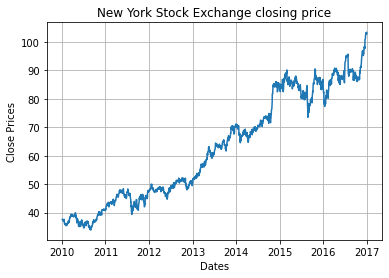

In [12]:
#plot close priceplt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['close'])
plt.title('New York Stock Exchange closing price')
plt.show()

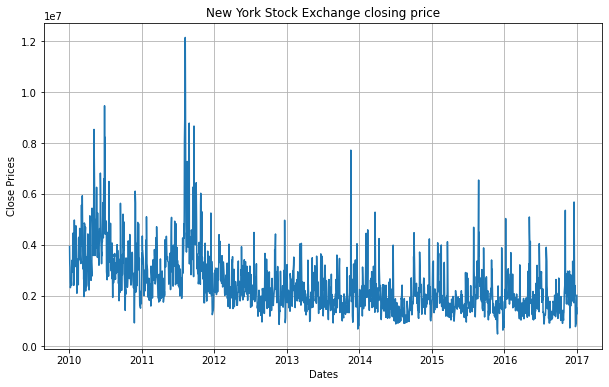

In [13]:
#plot bar/box graph by calculating mean/median for every quarter for 7 years to observe the pattern
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['volume'])
plt.title('New York Stock Exchange closing price')
plt.show()

In [14]:
#plot change price

""""plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
data['change'].plot(kind='bar')
plt.title('New York Stock Exchange closing price')
plt.show()"""


'"plt.figure(figsize=(20,10))\nplt.grid(True)\nplt.xlabel(\'Dates\')\nplt.ylabel(\'Close Prices\')\ndata[\'change\'].plot(kind=\'bar\')\nplt.title(\'New York Stock Exchange closing price\')\nplt.show()'

In [15]:
#plot price variation for each of the week observe price increases/ decreses

In [16]:
#calculate average/median momentun for each month

In [17]:
#bar plot change adn volatality for each quarter

In [18]:
#bar plot momentun n stock momentum

In [19]:
final_data = data.iloc[:,np.r_[2,6:8]]
final_data = final_data.dropna()
final_data = final_data.round(4)
print(final_data.head(10))

              close  change  momentum
date                                 
2010-01-05  37.4012 -0.2019      -1.0
2010-01-06  37.3134 -0.0878      -1.0
2010-01-07  37.2959 -0.0176      -1.0
2010-01-08  37.2432 -0.0527      -1.0
2010-01-11  37.4100  0.1668       1.0
2010-01-12  37.1466 -0.2634      -1.0
2010-01-13  37.4188  0.2722       1.0
2010-01-14  37.3134 -0.1054      -1.0
2010-01-15  37.1115 -0.2019      -1.0
2010-01-19  37.6734  0.5619       1.0


In [65]:
def model(forecast_out,final_data):
    final_data['Prediction'] = final_data[['close']].shift(-forecast_out)
    X = np.array(final_data.drop(['Prediction'],1))
    X = X[:-forecast_out]
    Y = np.array(final_data['Prediction'])
    Y = Y[:-forecast_out]
    # Split the data into 80% training and 20% testing
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    # Create and train the Linear Regression  Model
    lr = LinearRegression()
    # Train the model
    lr.fit(x_train, y_train)
    # The best possible score is 1.0
    lr_confidence = lr.score(x_test, y_test)
    #Create and train the Support Vector Machine (Regressor) 
    svr_rbf = SVR(kernel='rbf',  C=1e3, gamma=0.1) 
    svr_rbf.fit(x_train, y_train)
    # The best possible score is 1.0
    svr_confidence = svr_rbf.score(x_test, y_test)
    x_forecast = np.array(final_data.drop(['Prediction'],1))[-forecast_out:]
    # Print linear regression model predictions for the next 'm' days
    lr_prediction = lr.predict(x_forecast)
    # Print support vector regressor model predictions for the next 6 months
    x_forecast
    svm_prediction = svr_rbf.predict(x_forecast)
    #data_close.index
    x_forecast_dates = np.array(final_data.index, dtype='datetime64[D]')[-forecast_out:]
    x_close = final_data['close'][-forecast_out:]
    plt.scatter(x_forecast_dates,x_close, color='black', label = 'Close Price')
    plt.plot(x_forecast_dates, svm_prediction, color='red', label='SVR RBF')
    plt.plot(x_forecast_dates, lr_prediction, color='orange', label='Linear Reg')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()
    
    return lr_confidence,svr_confidence

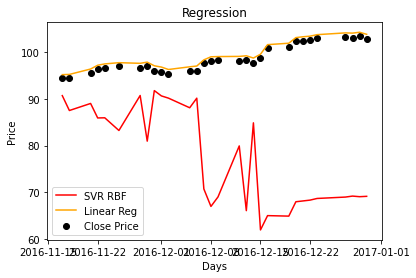

(0.9672691706967038, 0.9712367087344591)

In [63]:
model(30,final_data)

Predicting stock price for last 30 days


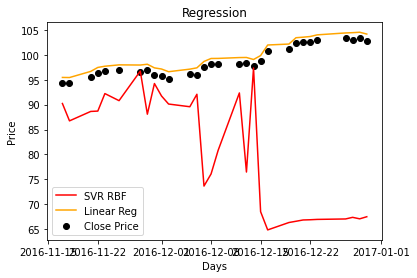

(0.9692719275464688, 0.9758428878644336)
Predicting stock price for last 90 days


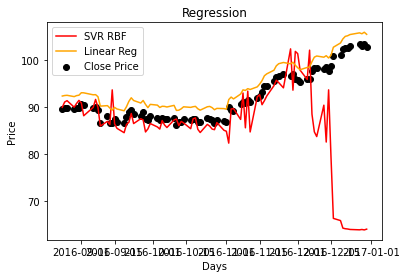

(0.9439170628843195, 0.9446308682803058)
Predicting stock price for last 150 days


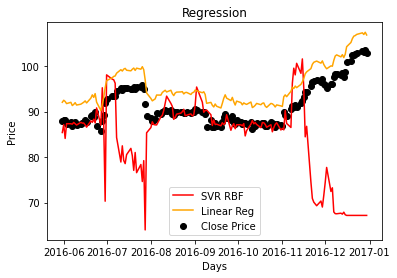

(0.9006014425331297, 0.9350071496023064)
Predicting stock price for last 210 days


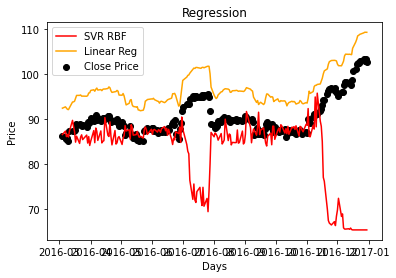

(0.8812497288011153, 0.9430330067450683)
Predicting stock price for last 250 days


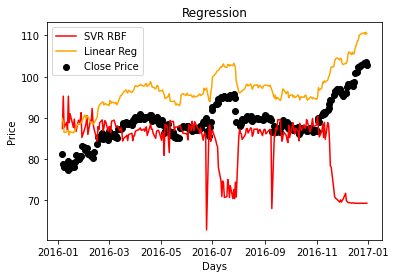

(0.8878450494488729, 0.9483061747553165)


In [72]:
m = [30,90,150,210,250]

for i in m:
    print('Predicting stock price for last',i,'days')
    accuracy = model(i,final_data)
    print(accuracy)

In [47]:
# A variable for predicting 'n' days out into the future
forecast_out = 250 #'n=127' days is last 6months in 2016
#Create another column (the target ) shifted 'n' units up
final_data['Prediction'] = final_data[['close']].shift(-forecast_out)
#print the new data set
#final_data=final_data.fillna(0)
#print(final_data.tail(128))
#len(final_data)

In [21]:
#final_data.to_csv(index=True)
final_data.to_csv(r'final_data.csv', index = False)

In [22]:
#pred = final_data.iloc[-30:]
#print(pred)

In [24]:
### Create the independent data set (X) to train unstructed data independent dataset  #######
# Convert the dataframe to a numpy array by droping prdiction variable
X = np.array(final_data.drop(['Prediction'],1))

#Remove the last '127' rows i.e 6 months data
X = X[:-forecast_out]
#print(X)

In [25]:
### Create the dependent data set (y) to train from predicted values usinf dependent dataset #####
# Convert the dataframe to a numpy array 
Y = np.array(final_data['Prediction'])
# Get all of the y values except the last '127' rows
Y = Y[:-forecast_out]
#print(Y)

In [26]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [31]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)
#lr.summary()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8855684815549716


In [36]:
#Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf',  C=1e3, gamma=0.1) 
#svr_lin = SVR(kernel='linear', C= 1e3)
#svr_poly= SVR(kernel='poly', C=1e3, degree=2)
svr_rbf.fit(x_train, y_train)
#svr_lin.fit(x_train, y_train)
#svr_poly.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svr_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svr_confidence)

svm confidence:  0.9548333024361194


In [38]:
# Set x_forecast equal to the last 127 rows of the original data set from Adj. Close column
x_forecast = np.array(final_data.drop(['Prediction'],1))[-forecast_out:]
#x_forecast = np.array(final_data.drop(['Prediction'],1))
#print(x_forecast)
#x_forecast=x_forecast.reshape(1,-1)

In [40]:
x_close = final_data['close'][-forecast_out:]

In [41]:
# Print linear regression model predictions for the next '30' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
#len(lr_prediction)

[ 89.55887626  88.27293656  86.23051417  86.66841203  87.15775189
  86.59973913  86.15865254  86.34912631  86.62975234  86.50300729
  86.88940099  88.06363333  88.42602086  88.66518575  88.33661159
  88.93671699  89.62428461  90.54069421  90.2843101   89.66434923
  90.64258912  89.97713432  88.81779329  88.65270011  89.09938442
  88.23507034  88.93182017  90.52786661  92.41607121  92.66281644
  93.33312596  94.00571807  93.47422982  93.22543453  93.67636729
  93.27076843  92.87175763  93.41182181  93.92307042  93.49105654
  94.03195109  93.56677412  93.36678778  93.81242601  93.02250037
  93.90693617  95.07028469  95.51072618  95.6189196   96.12256779
  96.1295788   96.91184828  96.26044921  95.95306292  96.7738658
  95.99059234  96.73621008  96.68832929  97.44796388  97.99181984
  97.44208832  97.88726666  98.1415165   97.90703793  98.07545461
  97.49597614  97.9610689   98.29565009  98.39982759  97.53229107
  98.420746    98.85235052  97.89565733  97.26051044  97.58962869
  96.945843

In [58]:
# Print support vector regressor model predictions for the next 6 months
x_forecast
svm_prediction = svr_rbf.predict(x_forecast)
#print(svm_prediction)

In [43]:
#data_close.index
x_forecast_dates = np.array(final_data.index, dtype='datetime64[D]')[-forecast_out:]

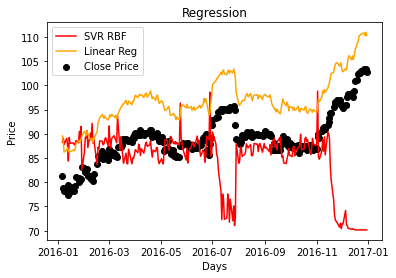

In [59]:
plt.scatter(x_forecast_dates,x_close, color='black', label = 'Close Price')
plt.plot(x_forecast_dates, svm_prediction, color='red', label='SVR RBF')
#plt.plot(x_forecast_dates, svr_lin.predict(x_forecast), color='green', label='SVR Linear')
plt.plot(x_forecast_dates, lr_prediction, color='orange', label='Linear Reg')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Regression')
plt.legend()
plt.show()

In [46]:
#plt.plot(x_forecast_dates, svr_poly.predict(x_forecast), color='blue', label='SVR Poly')
final_data.head(10)

,close,change,momentum,Prediction
date,,,,
2010-01-05,37.4012,-0.2019,-1.0,40.6321
2010-01-06,37.3134,-0.0878,-1.0,41.3082
2010-01-07,37.2959,-0.0176,-1.0,41.1589
2010-01-08,37.2432,-0.0527,-1.0,41.8174
2010-01-11,37.4100,0.1668,1.0,42.1422
2010-01-12,37.1466,-0.2634,-1.0,42.2388
2010-01-13,37.4188,0.2722,1.0,42.2564
2010-01-14,37.3134,-0.1054,-1.0,42.4495
2010-01-15,37.1115,-0.2019,-1.0,43.0026
